# Numerical Simulation Laboratory

# Numerical exercise 10

## Exercise 10.1
Sviluppo di un algoritmo di simulated annealing per la soluzione del *Travelling Salesman Problem*. 

Come per l'algoritmo genetico, fisso le posizioni $\vec{c}_0, \vec{c}_1 \dots \vec{c}_N$ di $N$ città e rappresento i possibili percorsi con un vettore di interi che indica l'ordine con cui vengono raggiunte le città durante il cammino:
$$ \left [0, 1, 2, \dots, n, \dots N \right] \,.$$
Come nel caso precedente, i possibili percorsi devono partire sempre dalla stessa città e devono passare una ed una sola volta da ciascuna città.
Applicando il simulated annealing, campiono lo spazio dei possibili percorsi sfruttando **l'algoritmo di Metropolis** con una probabilità dipendente da una temperatura fittizia $t$ che cala gradualmente durante l'esecuzione del programma. Ad ogni step dell'algoritmo, applicando gli **operatori di mutazione** sul cammino attuale, genero un nuovo percorso che accetto o rifiuto con una probabilità pari a:
    $$ \alpha = min \left(1, \exp^{-\beta \left( L'(\vec{x}')-L(\vec{x}) \right)} \right) \,,$$
dove $L(\vec{x})$ è la lunghezza del percorso attuale, $L'(\vec{x}')$ è la lunghezza del percorso proposto e $\beta=\frac{1}{t}$ è l'inverso della temperatura fittizia. In questo modo campiono lo spazio dei possibili percorsi generando $nstep$ cammini ad ogni temperatura fissata e ottenendo progressivamente il percorso corrispondente al minimo della lunghezza.

### <font color='red'> Mutazioni</font>
Per determinare una nuova percorso a partire da uno dato, utilizzo gli operatori di mutazione seguenti:

- *Pair permutation*, che consiste nello scambio di due città scelte casualmente, ad eccezione della prima che non deve essere modificata.

- *Multiple permutation*, che consiste nello scambio di 2,3,4,5,6 o 7 coppie di città scelte casualmente, ad eccezione della prima città del percorso che non deve essere modificata. 

- *Reverse*, che consiste nell'inversione dell'ordine con cui vengono percorse 2,3 o 4 città lungo il cammino. La città da cui parte l'inversione viene scelta in modo casuale trascurando la prima città del percorso che non deve essere modificata.

- *Shift*, che consiste nello slittamento di 2,3 o 4 città lungo il percorso ad eccezione della prima la cui posizione deve rimanere invariata.

Applico al più uno solo di questi operatori di mutazione nella generazione di ogni nuovo percorso. Le probabilità con cui applico tali operatori non sono fisse ma variano con la temperatura: all'inizio, quando la temperatura è più elevata, le mutazioni sono più probabili, mentre alla fine, a temperature più basse, le mutazioni diventano meno probabili.

### <font color='blue'> Città lungo una circonferenza</font>
Applico il simulated annealing al caso di $32$ città disposte lungo una circonferenza di raggio $r=10$.
Genero $nstep=10^6$ percorsi differenti ad ogni temperatura fissata e modifico la temperatura per $25$ volte nell'intervallo $[0.01, 5]$. In questo modo determino complessivamente $2.5 \times 10^7$ cammini differenti, uno per ciascuno step dell'algoritmo. 

Il grafico seguente mostra il confronto tra la lunghezza del percorso ottenuto tramite simulated annealing e la lunghezza del percorso migliore di ogni generazione ottenuto tramite l'algoritmo genetico della precedente esercitazione. Sebbene il numero di step utilizzati nel simulated annealing sia molto maggiore del numero di generazioni dell'algoritmo genetico, il tempo computazionale è significativamente inferiore. Si può osservare che i due procedimenti convergono a valori di lunghezza simile ma, in questo caso, l'algoritmo genetico produce una soluzione migliore.

Lunghezza finale del Simulated Annealing:  65.1068
Lunghezza finale dell'Algoritmo Genetico:  62.403


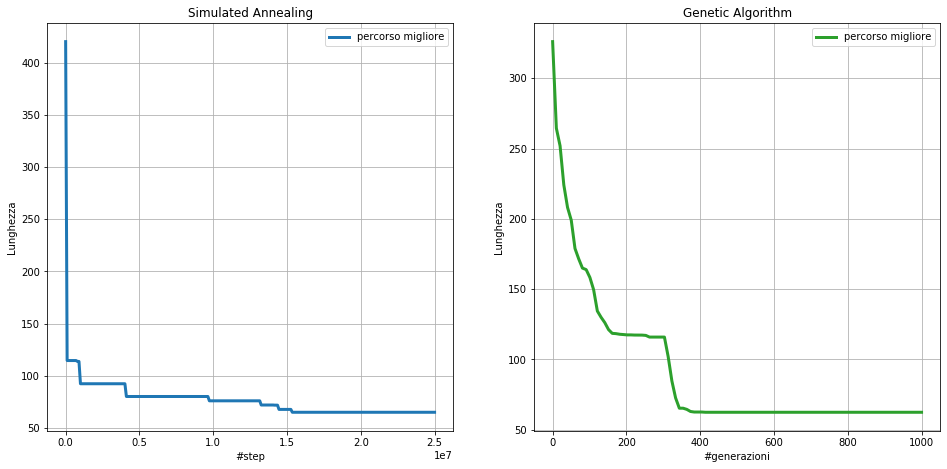

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 7.5))
nstep = 25000000

plt.subplot(121) #Simulated Annealing
xl, L = np.loadtxt('./Files/Circle/lenght.out', delimiter='  ', unpack=True)
x = np.linspace(0, nstep, len(xl))
print("Lunghezza finale del Simulated Annealing: ", L[len(L)-1])

plt.plot(x, L, label='percorso migliore', lw=3)
plt.title("Simulated Annealing")
plt.xlabel('#step')
plt.ylabel('Lunghezza')
plt.legend()
plt.grid(True)

plt.subplot(122) #Genetic Algorithm
xl, L = np.loadtxt('../LSN_Exercise_09/Files/Circle/lenght.out', delimiter='  ', unpack=True)
x = np.linspace(0, 1000, len(xl))
print("Lunghezza finale dell'Algoritmo Genetico: ", L[len(L)-1])

plt.plot(x, L, label='percorso migliore', lw=3, c='tab:green')
plt.title("Genetic Algorithm")
plt.xlabel('#generazioni')
plt.ylabel('Lunghezza')
plt.legend()
plt.grid(True)

Il grafico seguente mostra le probabilità di applicazione degli operatori di mutazione in funzione della temperatura fittizia: il programma aggiorna le probabilità degli operatori di mutazione ogni volta che viene aggiornata la temperatura. Come per l'algoritmo genetico gli operatori di mutazione sono **mutualmente esclusivi** perciò ad ogni step ne applico al più uno solo. Facendo decrescere le probabilità al diminuire della temperatura, alla fine del procedimento non vi è certezza di applicare mutazioni tra uno step e l'altro.

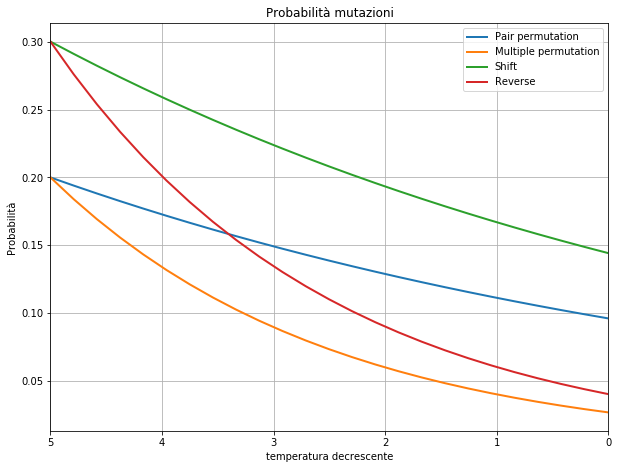

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7.5))

t, pmpp, pmsh, pmrev, pmul = np.loadtxt('./Files/Circle/probabilities.out', delimiter='  ', unpack=True)

plt.plot(t, pmpp, label='Pair permutation', lw=2)
plt.plot(t, pmul, label='Multiple permutation', lw=2)
plt.plot(t, pmsh, label='Shift', lw=2)
plt.plot(t, pmrev, label='Reverse', lw=2)

plt.xlim(5, 0)
plt.title("Probabilità mutazioni")
plt.xlabel('temperatura decrescente')
plt.ylabel('Probabilità')
plt.legend()
plt.grid(True)

Il grafico seguente mostra il percorso migliore ottenuto tramite simulated annealing. Si può osservare che si raggiunge un buon risultato ma non il migliore possibile: due città infatti non sono percorse seguendo l'ordine della circonferenza.

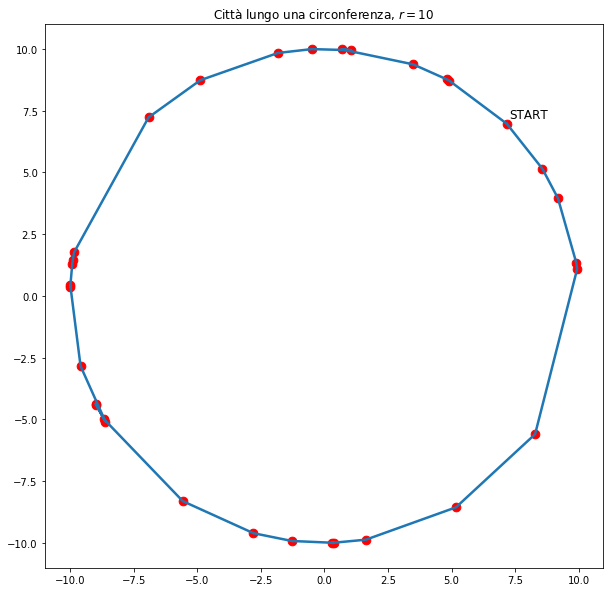

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

plt.figure(figsize=(10, 10))
ncities = 32

xc, yc = np.loadtxt('./Files/Circle/cities.out', unpack=True)
path = np.loadtxt('./Files/Circle/best_path.out', unpack=True)

xp = []
yp = []

for i in range(ncities):
    index = int(path[i])
    xp.append(xc[index])
    yp.append(yc[index])

index = int(path[0])
xp.append(xc[index])
yp.append(yc[index])

#numerazione delle città
#for i in range(32):
#    plt.text(xp[i]+0.1, yp[i]+0.1, i, fontsize=12)

plt.title("Città lungo una circonferenza, $r=10$")
plt.text(xc[0]+0.1, yc[0]+0.25, 'START', fontsize=12)
plt.scatter(xc, yc, s=75, c='red') #città
plt.plot(xp, yp,  zorder=1, lw=2.5) #percorso

plt.show()

### <font color='blue'> Città in un quadrato</font>
Applico il simulated annealing al caso di $32$ città disposte casualmente all'interno di un quadrato di lato $l=10$. Genero $nstep=10^6$ percorsi differenti ad ogni temperatura fissata e modifico la temperatura per $25$ volte nell'intervallo $[0.01, 5]$. In questo modo determino complessivamente $2.5 \times 10^7$ cammini differenti, uno per ciascuno step dell'algoritmo. 

Il grafico seguente mostra il confronto tra la lunghezza del percorso ottenuto tramite simulated annealing e la lunghezza del percorso migliore di ogni generazione ottenuto tramite l'algoritmo genetico della precedente esercitazione. Sebbene il numero di step utilizzati nel simulated annealing sia molto maggiore del numero di generazioni dell'algoritmo genetico, il tempo computazionale è inferiore. Si può osservare che i due procedimenti convergono a valori di lunghezza simile ma, anche in questo caso, l'algoritmo genetico produce una soluzione migliore.

Lunghezza finale del Simulated Annealing:  48.8208
Lunghezza finale dell'algoritmo genetico:  48.5786


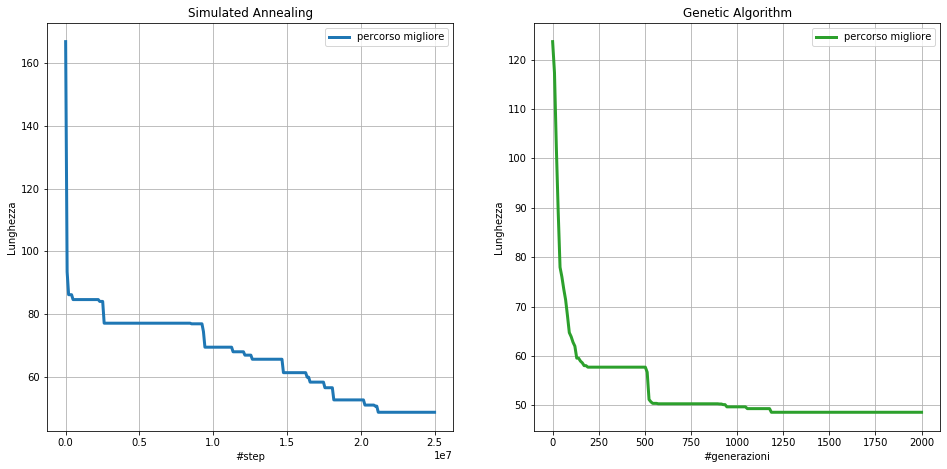

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 7.5))
nstep = 25000000

plt.subplot(121) #Simulated Annealing
xl, L = np.loadtxt('./Files/Square/lenght.out', delimiter='  ', unpack=True)
x = np.linspace(0, nstep, len(xl))
print("Lunghezza finale del Simulated Annealing: ", L[len(L)-1])


plt.plot(x, L, label='percorso migliore', lw=3)
plt.title("Simulated Annealing")
plt.xlabel('#step')
plt.ylabel('Lunghezza')
plt.legend()
plt.grid(True)

plt.subplot(122) #Genetic algorithm
xl, L = np.loadtxt('../LSN_Exercise_09/Files/Square/lenght.out', delimiter='  ', unpack=True)
x = np.linspace(0, 2000, len(xl))
print("Lunghezza finale dell'algoritmo genetico: ", L[len(L)-1])


plt.plot(x, L, label='percorso migliore', lw=3, c='tab:green')
plt.title("Genetic Algorithm")
plt.xlabel('#generazioni')
plt.ylabel('Lunghezza')
plt.legend()
plt.grid(True)

Il grafico seguente mostra le probabilità di applicazione degli operatori di mutazione in funzione della temperatura fittizia: il programma aggiorna le probabilità degli operatori di mutazione ogni volta che viene aggiornata la temperatura. Come per l'algoritmo genetico gli operatori di mutazione sono **mutualmente esclusivi** perciò ad ogni step ne applico al più uno solo. Facendo decrescere le probabilità al diminuire della temperatura, alla fine del procedimento non vi è certezza di applicare mutazioni tra uno step e l'altro.

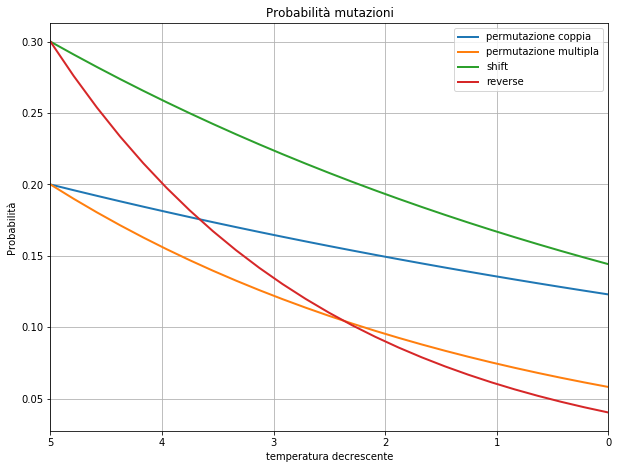

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7.5))

t, pmpp, pmsh, pmrev, pmul = np.loadtxt('./Files/Square/probabilities.out', delimiter='  ', unpack=True)

plt.plot(t, pmpp, label='permutazione coppia', lw=2)
plt.plot(t, pmul, label='permutazione multipla', lw=2)
plt.plot(t, pmsh, label='shift', lw=2)
plt.plot(t, pmrev, label='reverse', lw=2)

plt.xlim(5, 0)
plt.title("Probabilità mutazioni")
plt.xlabel('temperatura decrescente')
plt.ylabel('Probabilità')
plt.legend()
plt.grid(True)

Il grafico seguente mostra il percorso migliore ottenuto tramite simulated annealing. Si può osservare che si raggiunge un ottimo risultato in quanto non sono presenti incroci tra le città.

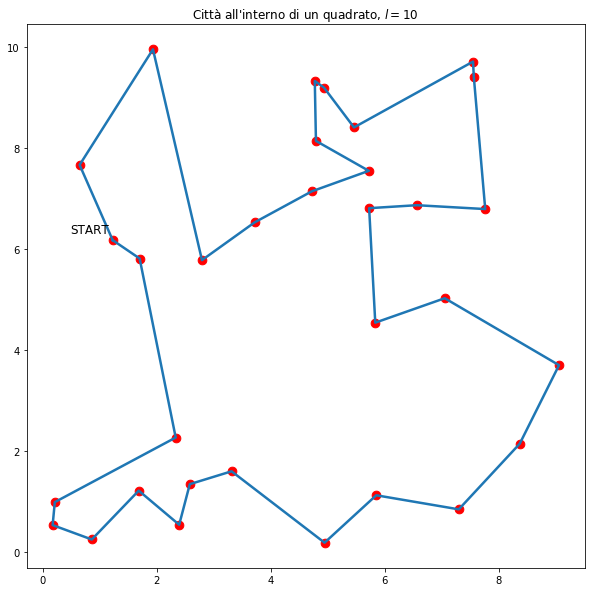

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

plt.figure(figsize=(10, 10))
ncities = 32

xc, yc = np.loadtxt('./Files/Square/cities.out', unpack=True)
path = np.loadtxt('./Files/Square/best_path.out', unpack=True)

xp = []
yp = []

for i in range(ncities):
    index = int(path[i])
    xp.append(xc[index])
    yp.append(yc[index])

index = int(path[0])
xp.append(xc[index])
yp.append(yc[index])

#numerazione delle città
#for i in range(32):
#    plt.text(xp[i]+0.1, yp[i]+0.1, i, fontsize=12)

plt.title("Città all'interno di un quadrato, $l=10$")
plt.text(xc[0]-0.75, yc[0]+0.15, 'START', fontsize=12)
plt.scatter(xc, yc, s=75, c='red') #città
plt.plot(xp, yp,  zorder=1, lw=2.5) #percorso
plt.show()

## Exercise 10.2
Parallelizzazione dell'algoritmo genetico sviluppato per la precedente esercitazione mediante uso dell'interfaccia *MPI*.


nmigr = 50

Lunghezza finale dell'algoritmo non parallelo: 48.5786
Lunghezza finale del nodo 0 : 48.7861
Lunghezza finale del nodo 1 : 48.7861
Lunghezza finale del nodo 2 : 48.7861
Lunghezza finale del nodo 3 : 48.7861


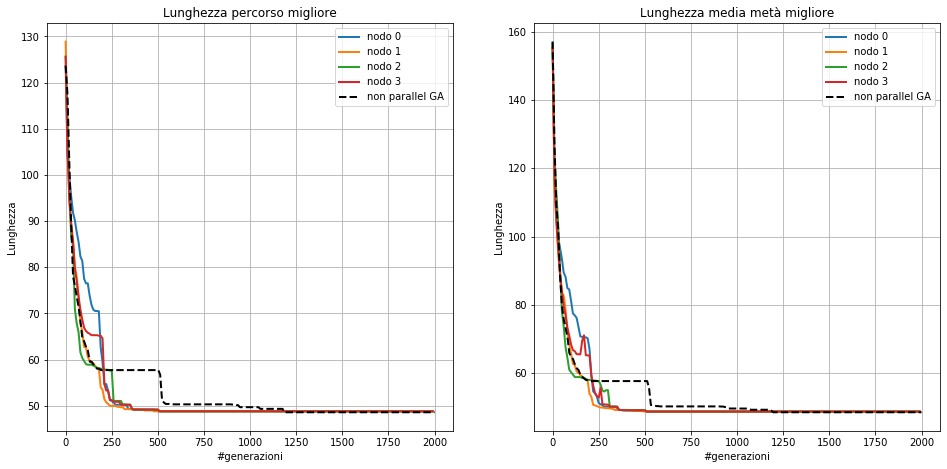

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 7.5))
N = []
L = []
lfinpar = []

plt.subplot(121)
xl, L = np.loadtxt('../LSN_Exercise_09/Files/Square/lenght.out', delimiter='  ', unpack=True)
lfin = L[len(L)-1]
x = np.linspace(0, 2000, len(xl))
for i in range (4):
    lenfile = './Files/Parallelized/lenght_rank' + str(i) + '.out'
    n, l = np.loadtxt(lenfile, delimiter='  ', unpack=True)
    lfinpar.append(l[len(l)-1])
    plt.plot(n, l, lw=2, label='nodo ' + str(i))
    
plt.plot(x, L, lw=2, ls='dashed', c='black', label='non parallel GA')        
plt.title('Lunghezza percorso migliore')
plt.xlabel('#generazioni')
plt.ylabel('Lunghezza')
plt.grid(True)
plt.legend()

plt.subplot(122)
xl, L = np.loadtxt('../LSN_Exercise_09/Files/Square/avelenght.out', delimiter='  ', unpack=True)
for i in range(4):
    avelfile = './Files/Parallelized/avelenght_' + str(i) + '.out'
    n, l = np.loadtxt(avelfile, delimiter='  ', unpack=True)
    plt.plot(n, l, lw=2, label='nodo ' + str(i))

plt.plot(x, L, lw=2, ls='dashed', c='black', label='non parallel GA')        
plt.title('Lunghezza media metà migliore')
plt.xlabel('#generazioni')
plt.ylabel('Lunghezza')
plt.grid(True)
plt.legend()

print("Lunghezza finale dell'algoritmo non parallelo:", lfin)
for i in range(4):
    print("Lunghezza finale del nodo", i, ":", lfinpar[i])


plt.show()

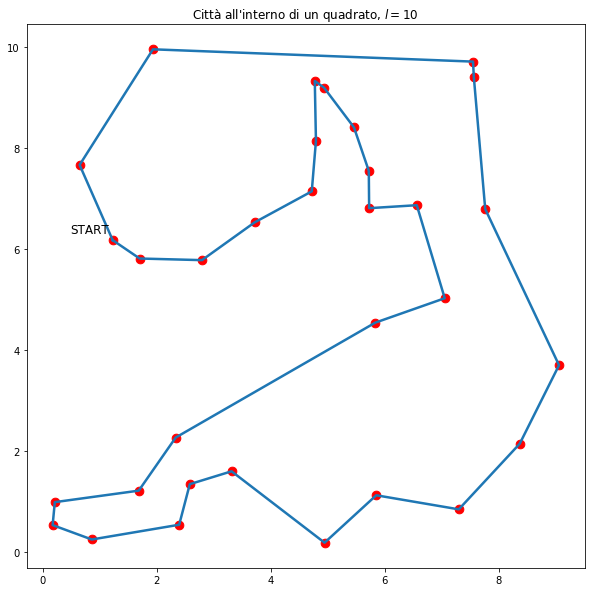

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

plt.figure(figsize=(10, 10))
ncities = 32

xc, yc = np.loadtxt('./Files/Parallelized/cities.out', unpack=True)
path = np.loadtxt('./Files/Parallelized/best_path.out', unpack=True)

xp = []
yp = []

for i in range(ncities):
    index = int(path[i])
    xp.append(xc[index])
    yp.append(yc[index])

index = int(path[0])
xp.append(xc[index])
yp.append(yc[index])

#numerazione delle città
#for i in range(32):
#    plt.text(xp[i]+0.1, yp[i]+0.1, i, fontsize=12)

plt.title("Città all'interno di un quadrato, $l=10$")
plt.text(xc[0]-0.75, yc[0]+0.15, 'START', fontsize=12)
plt.scatter(xc, yc, s=75, c='red') #città
plt.plot(xp, yp,  zorder=1, lw=2.5) #percorso
plt.show()